In [108]:
#import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [109]:
#Import csvs

companies = pd.read_csv('companies.csv')
rounds2 = pd.read_csv('rounds2.csv')
mapping = pd.read_csv('mapping.csv')

In [110]:
#Print Shape

print(companies.shape)
print(rounds2.shape)

(66368, 10)
(114949, 6)


In [111]:
#Rename columns to match

rounds2.rename(columns={'company_permalink' : 'permalink'}, inplace=True)

In [112]:
#Casefold to cleanup data and match unique IDs

companies['permalink'] = companies['permalink'].str.casefold()
rounds2['permalink'] = rounds2['permalink'].str.casefold()

In [113]:
#Check Unique no. of companies

print(companies['permalink'].nunique())
print(rounds2['permalink'].nunique())

66368
66373


In [114]:
#Check how many companies in 'Rounds2' are not present in 'Companies'

rounds2[~rounds2['permalink'].str.casefold().isin(companies['permalink'].str.casefold())].nunique()

permalink                  39
funding_round_permalink    40
funding_round_type          7
funding_round_code          2
funded_at                  37
raised_amount_usd          21
dtype: int64

In [115]:
#Create MasterFrame

master_frame = pd.merge(rounds2, companies, on='permalink', how='left')
master_frame.shape

(114949, 15)

In [116]:
master_frame['funding_round_type'].value_counts()

venture                  55494
seed                     30524
debt_financing            6895
angel                     6094
undisclosed               4897
equity_crowdfunding       3257
private_equity            2285
grant                     2200
convertible_note          1817
post_ipo_equity            638
product_crowdfunding       410
non_equity_assistance      191
post_ipo_debt              152
secondary_market            95
Name: funding_round_type, dtype: int64

In [117]:
#Group by investment Type

funding_type = master_frame.groupby('funding_round_type')

In [118]:
#Check Representative Values of Venture, Seed, Angel, Private Equity

ven_med = funding_type.get_group('venture')['raised_amount_usd'].median()
ven_mean = funding_type.get_group('venture')['raised_amount_usd'].mean()
print(ven_mean)
print(ven_med)

11748949.129489528
5000000.0


In [119]:
seed_med = funding_type.get_group('seed')['raised_amount_usd'].median()
seed_mean = funding_type.get_group('seed')['raised_amount_usd'].mean()
print(seed_mean)
print(seed_med)

719817.9969071728
275000.0


In [120]:
angel_med = funding_type.get_group('angel')['raised_amount_usd'].median()
angel_mean = funding_type.get_group('angel')['raised_amount_usd'].mean()
print(angel_mean)
print(angel_med)

958694.4697530865
400000.0


In [121]:
priv_med = funding_type.get_group('private_equity')['raised_amount_usd'].median()
priv_mean = funding_type.get_group('private_equity')['raised_amount_usd'].mean()
print(priv_mean)
print(priv_med)

73308593.02944215
20000000.0


<AxesSubplot:>

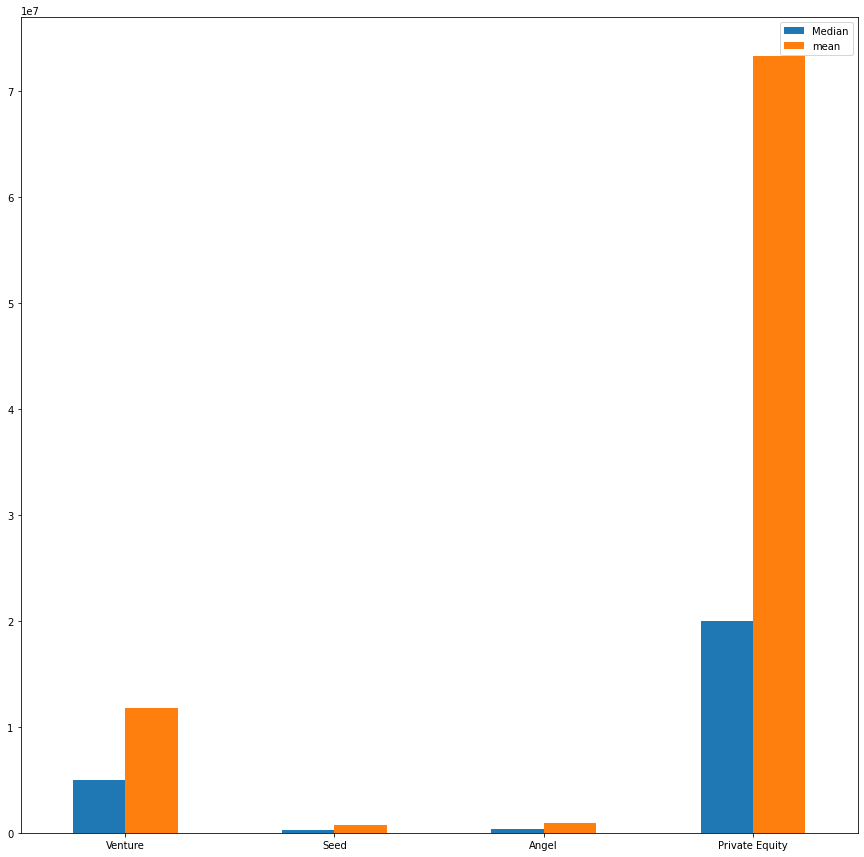

In [122]:
#Plot of investment types to show the best choice

median = [ven_med, seed_med, angel_med, priv_med]
mean = [ven_mean, seed_mean, angel_mean, priv_mean]
index = ['Venture', 'Seed', 'Angel','Private Equity']
plot1 = pd.DataFrame({'Median': median, 'mean': mean}, index=index)
plot1.plot.bar(rot=0, figsize=(15,15))

In [123]:
funding_type = master_frame.groupby('funding_round_type')

In [124]:
#Create a dataframe with only Ventue Investments

venture_frame = funding_type.get_group('venture')

In [125]:
#Groupby Countries

countries_frame = venture_frame.groupby('country_code')

In [126]:
#Top9 Heavily invested companies

countries_top9 = countries_frame['raised_amount_usd'].sum().sort_values(ascending=False).head(9)
countries_top9

country_code
USA    4.225108e+11
CHN    3.983542e+10
GBR    2.024563e+10
IND    1.439186e+10
CAN    9.583332e+09
FRA    7.259537e+09
ISR    6.907515e+09
DEU    6.346960e+09
JPN    3.363677e+09
Name: raised_amount_usd, dtype: float64

<AxesSubplot:>

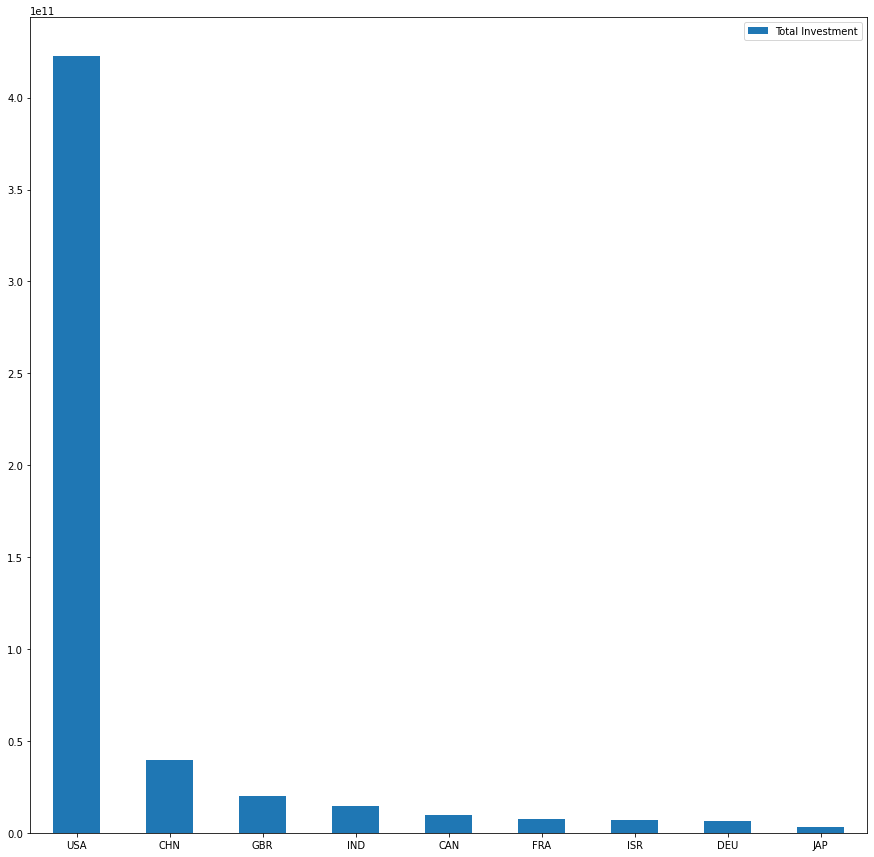

In [127]:
#Plot to show the amounts invested in each Countries of the Top9

list_contname = ['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JAP']
list_cont = [i for i in countries_top9.head(9)]
plot2 = pd.DataFrame({'Total Investment': list_cont}, index=list_contname)
plot2.plot.bar(rot=0, figsize=(15,15))

In [128]:
#Picking the top 3 English Speaking Countries

countries_top3_list = ['USA', 'GBR', 'CAN']
countries_top3 = venture_frame[venture_frame['country_code'].isin(countries_top3_list)]

In [129]:
#Creating a Primary Sector Column

countries_top3['primary_sector'] = countries_top3['category_list'].str.split('|').str[0]

<ipython-input-129-d1f26712766b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_top3['primary_sector'] = countries_top3['category_list'].str.split('|').str[0]


In [130]:
#Create a list of major sectors

sector_list1 = mapping.columns.to_list()
sector_list1.remove('category_list')
sector_list1

['Automotive & Sports',
 'Blanks',
 'Cleantech / Semiconductors',
 'Entertainment',
 'Health',
 'Manufacturing',
 'News, Search and Messaging',
 'Others',
 'Social, Finance, Analytics, Advertising']

In [131]:
#Create a column 'Type' mapping dataframe to assingn each row to one of the primary sectors based on key

for i in sector_list1:
    mapping.loc[mapping[i] == 1, 'Type'] = i

In [132]:
#Create a mapping Dictionary

mapping_dict = dict(zip(mapping['category_list'], mapping['Type']))

In [133]:
#Map the companies to a primary_sector 

countries_top3['primary_sector'] = countries_top3['primary_sector'].map(mapping_dict)

<ipython-input-133-3fb40b270fae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_top3['primary_sector'] = countries_top3['primary_sector'].map(mapping_dict)


In [134]:
#Seperating the dataframe by countries
frame_USA = countries_top3[countries_top3['country_code'] == 'USA']
frame_GBR = countries_top3[countries_top3['country_code'] == 'GBR']
frame_CAN = countries_top3[countries_top3['country_code'] == 'CAN']

In [135]:
#Dropping all rows with nan investment
frame_USA = frame_USA[frame_USA['raised_amount_usd'].notna() == True]
frame_GBR = frame_GBR[frame_GBR['raised_amount_usd'].notna() == True]
frame_CAN = frame_CAN[frame_CAN['raised_amount_usd'].notna() == True]

In [136]:
#No. of investments for each country
print(frame_USA['raised_amount_usd'].count())
print(frame_GBR['raised_amount_usd'].count())
print(frame_CAN['raised_amount_usd'].count())

36139
2055
1256


In [137]:
#Amount of investment in each country
print(frame_USA['raised_amount_usd'].sum())
print(frame_GBR['raised_amount_usd'].sum())
print(frame_CAN['raised_amount_usd'].sum())

422510842796.0
20245627416.0
9583332317.0


In [138]:
#Groupby primary sector for each of the top 3 countries

frame_USA_Sector = frame_USA.groupby('primary_sector', sort=True)
frame_GBR_Sector = frame_GBR.groupby('primary_sector', sort=True)
frame_CAN_Sector = frame_CAN.groupby('primary_sector', sort=True)

In [139]:
frame_USA_Sector['raised_amount_usd'].count().sort_values(ascending=False)

primary_sector
Others                                     8243
Cleantech / Semiconductors                 7849
Social, Finance, Analytics, Advertising    5156
News, Search and Messaging                 4301
Health                                     3263
Manufacturing                              2453
Entertainment                              1756
Automotive & Sports                         505
Blanks                                      196
Name: raised_amount_usd, dtype: int64

In [140]:
frame_GBR_Sector['raised_amount_usd'].count().sort_values(ascending=False)

primary_sector
Others                                     507
Cleantech / Semiconductors                 433
Social, Finance, Analytics, Advertising    318
News, Search and Messaging                 241
Entertainment                              133
Manufacturing                              122
Health                                     118
Automotive & Sports                         44
Blanks                                      14
Name: raised_amount_usd, dtype: int64

In [141]:
frame_CAN_Sector['raised_amount_usd'].count().sort_values(ascending=False)

primary_sector
Cleantech / Semiconductors                 329
Others                                     326
Social, Finance, Analytics, Advertising    164
News, Search and Messaging                 132
Manufacturing                              100
Health                                      61
Entertainment                               50
Automotive & Sports                         14
Blanks                                      10
Name: raised_amount_usd, dtype: int64

In [142]:
#Highest Company in top sector
print(master_frame.loc[frame_USA_Sector.get_group('Others')['raised_amount_usd'].idxmax(), 'name'])
print(master_frame.loc[frame_GBR_Sector.get_group('Others')['raised_amount_usd'].idxmax(), 'name'])
print(master_frame.loc[frame_CAN_Sector.get_group('Cleantech / Semiconductors')['raised_amount_usd'].idxmax(), 'name'])

SoFi
OneWeb
Ram Power


In [143]:
#Highest Comapny in Second Sector
print(master_frame.loc[frame_USA_Sector.get_group('Cleantech / Semiconductors')['raised_amount_usd'].idxmax(), 'name'])
print(master_frame.loc[frame_GBR_Sector.get_group('Cleantech / Semiconductors')['raised_amount_usd'].idxmax(), 'name'])
print(master_frame.loc[frame_CAN_Sector.get_group('Others')['raised_amount_usd'].idxmax(), 'name'])

Freescale Semiconductor
Immunocore
D2L


In [144]:
#No of investments for the top 3 sectors for plotting
top3_sectors = ['Others', 'Cleantech / Semiconductors', 'Social, Finance, Analytics, Advertising']
USA = [8243, 7849, 6431]
GBR = [507, 433, 358]
CAN = [326, 329, 199]

<AxesSubplot:>

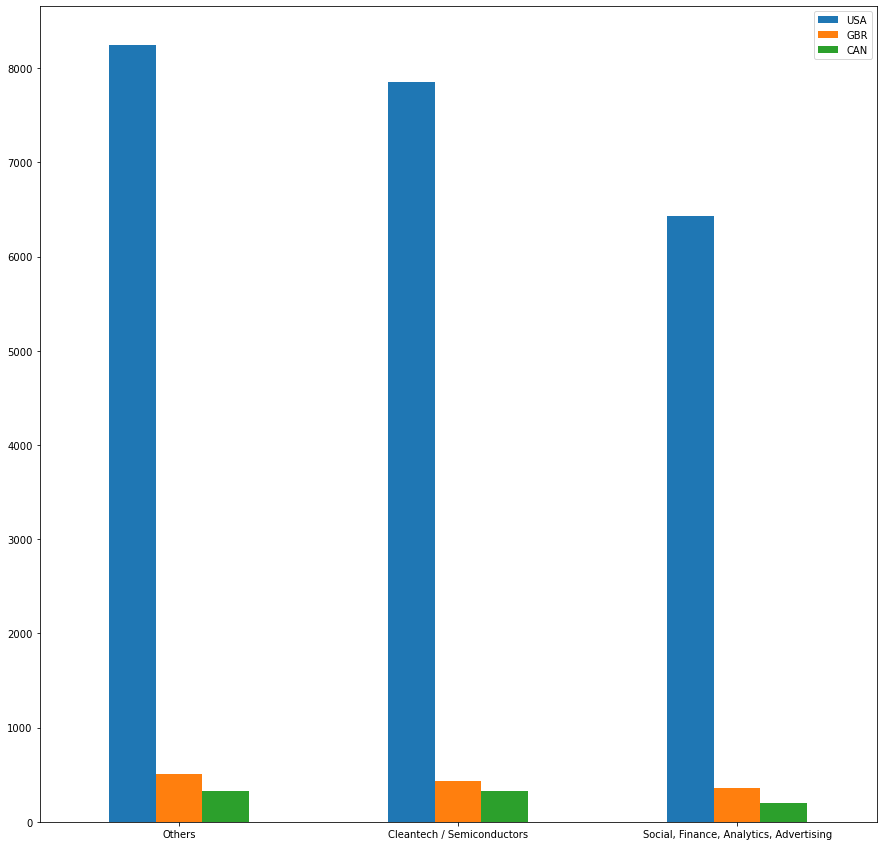

In [145]:
plot4 = pd.DataFrame({'USA': USA, 'GBR': GBR, 'CAN': CAN}, index=top3_sectors)
plot4.plot.bar(rot=0, figsize=(15,15))